## 1 - Packages ##

First, you need to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](pandas.pydata.org/) is an important package for Python data analysis.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [jdc](https://alexhagen.github.io/jdc/) : Jupyter magic that allows defining classes over multiple jupyter notebook cells.

In [1]:
!pip install jdc
import numpy as np
import pandas as pd
import jdc
import matplotlib.pyplot as plt
from plotutil import plotData

## 2 - Problem Statement ##

    - In Section 2.1, implement the helper function sigmoid 
    - In Section 2.2, implement the helper function normalize 
            (Attention: when you call it, DON'T use self.normalize becuase it is not a part of the LogisticRegression class)
    - In Section 2.3, define the LogisticRegression class

### 2.1 - Sigmoid Function ###

Define a helper function 1: $sigmoid(Z) = \frac{1}{1 + e^{-Z}}$

In [2]:
def sigmoid(Z):
    """
    Compute the sigmoid of Z

    Arguments:
    Z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(Z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1.0/(1+np.exp(Z))
    ### END CODE HERE ###
    
    return s

### 2.2 - Feature Scaling ###
Define helper function 2 -- features normalization:
$ \frac{x_{i} - mean}{\sigma}$, where $\sigma$ is the standard deviation

In [3]:
def normalize(matrix):
    '''
    matrix: the matrix that needs to be normalized. Note that each column represents a training example. 
         The number of columns is the the number of training examples
    '''
    # Calculate mean for each feature
    # Pay attention to the value of axis = ?
    # set keepdims=True to avoid rank-1 array
    ### START YOUR CODE HERE ### 
    # calculate mean (1 line of code)
    mean = np.mean(matrix, axis=1, keepdims=True)
    # calculate standard deviation (1 line of code)
    std = np.std(matrix, axis=1, keepdims=True)
    # normalize the matrix based on mean and std
    matrix = (matrix - mean) / std
    ### YOUR CODE ENDS ###

    return matrix

### 2.3 - Logistic Regress Class ###
You will create a neural network class - LogisticRegression:
    - initialize parameters, such as weights, learning rate, etc.
    - implement the gredient descent algorithm
    - implement the predict function to make predictions for new data sets
    - implement the normalization function

In [4]:
class LogisticRegression():
    def __init__(self, num_of_features=1, learning_rate=0.1):
        """
        This function creates a vector of zeros of shape (num_of_features, 1) for W and initializes w_0 to 0.

        Argument:
        num_of_features -- size of the W vector, i.e., the number of features, excluding the bias

        Returns:
        W -- initialized vector of shape (num_of_features, 1)
        w_0 -- initialized scalar (corresponds to the bias)
        """
        # n is the number of features
        self.n = num_of_features
        # alpha is the learning rate
        self.alpha = learning_rate
        
        ### START YOUR CODE HERE ### 
        #initialize self.W and self.w_0 to be 0's
        self.W = np.zeros(shape=(self.n, 1))
        self.w_0 = 0
        ### YOUR CODE ENDS ###
        assert(self.W.shape == (self.n, 1))
        assert(isinstance(self.w_0, float) or isinstance(self.w_0, int))

## 3 - Gradient Descent ##

Forward Propagation:
- You get X with its shape as (n, m)
- You compute  $$h_{W}(X) = a = \sigma(w^T X + w_{0}) = \frac{1}{1 + e^{-(w^T x + w_{0})}}\tag{1}$$
- You calculate the loss function:  $$L(W) = \frac{1}{m} \sum_{i=1}^{m}- y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{2}$$. 

Here are the two formulas you will be using: 

$$ dw_{j} =\frac{\partial L}{\partial w_{j}} = \frac{1}{m} \sum_{i=1}^m (( h_{W}(x^{(i)}) -y^{(i)}) * x_{j}^{(i)})\tag{3}$$
$$ dw_{0} = \frac{\partial L}{\partial w_{0}} = \frac{1}{m} \sum_{i=1}^m (h_{W}(x^{(i)}) -y^{(i)})\tag{4}$$

The weights will be updated:
$$ w_{j} = w_{j} - {\alpha} * dw_{j}\tag{5}$$
 

In [5]:
%%add_to LogisticRegression
def fit(self, X, Y, epochs=1000, print_loss=True):
    """
    This function implements the Gradient Descent Algorithm
    Arguments:
    X -- training data matrix: each column is a training example. 
            The number of columns is equal to the number of training examples
    Y -- true "label" vector: shape (1, m)
    epochs --

    Return:
    params -- dictionary containing weights
    losses -- loss values of every 100 epochs
    grads -- dictionary containing dw and dw_0
    """
    losses = []
    m = X.shape[1]
    
    for i in range(epochs):
        # Get the number of training examples
        

        ### START YOUR CODE HERE ### 
        # Calculate the hypothesis outputs A (≈ 2 lines of code)
        Z = np.dot(self.W.T, X) + self.w_0
        A = sigmoid(Z)
        # Calculate loss (≈ 1 line of code)
        loss = (1/m)*(-Y* np.log(A)) - (1-Y) * np.log(1-A)
        
        # Calculate the gredients for W and w_0
        dw = (1/m)*np.sum((A - Y) * X)
        dw_0 = (1/m)*np.sum(A - Y)

        # Weight updates
        self.W -= (self.alpha * dw)
        self.w_0 -= (self.alpha * dw_0)
        ### YOUR CODE ENDS ###

        if((i % 100) == 0):
            losses.append(loss)
             # Print the cost every 100 training examples
            if print_loss:
                print ("Cost after iteration %i: %f" %(i, loss))


    params = {
        "W": self.W,
        "w_0": self.w_0
    }

    grads = {
        "dw": dw,
        "dw_0": dw_0
    }

    return params, grads, losses

### Make Predictions ###
The predicted output is calculated as $h_{W}(X) = \sigma(W^T * X + b)$

In [6]:
%%add_to LogisticRegression
def predict(self, X):
    '''
    Predict the actual values using learned parameters (self.W, self.w_0)

    Arguments:
    X -- data of size (n x m)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))

    # Compute the actual values
    ### START YOUR CODE HERE ### 
    Z_prediction = np.dot(self.W.T, X) + self.w_0
    A = sigmoid(Z_prediction)
    
    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions Y_prediction[0,i]
        ### START CODE HERE ### (≈ 3 lines of code)

        ## Not sure about this block. But I think the logic goes like: if the hypothesis is less than the average, that means it is going towards 0. The same for the else block, but going towards 1 ##
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
        ### END CODE HERE ###
    
    ### YOUR CODE ENDS ###
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

## 4. Run the Experiments ##

In [7]:
# GRADED FUNCTION: model

def Run_Experiment(X_train, Y_train, X_test, Y_test, epochs = 2000, learning_rate = 0.5, print_loss = False):
    """
    Builds the multivariate linear regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) 
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector)
    epochs -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_loss -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    num_of_features = X_train.shape[0]
    model = LogisticRegression(num_of_features, learning_rate)
    
    
    ### START YOUR CODE HERE ###
    # Obtain the parameters, gredients, and losses by calling a model's method (≈ 1 line of code)
    parameters, grads, losses = model.fit(X_train, Y_train, epochs, print_loss)
    ### YOUR CODE ENDS ###
    
    ### START YOUR CODE HERE ###
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = model.predict(X_test)
    Y_prediction_train = model.predict(X_train)
    ### YOUR CODE ENDS ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    W = parameters['W']
    w_0 = parameters['w_0']
    print("W is " + str(W))
    print("w_0 is " + str(w_0))
    
    d = {"losses": losses,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "w_0" : w_0,
         "learning_rate" : learning_rate,
         "epochs": epochs}
    
    return d

### Load Data and Start the Learning Process ###
You can change num_iterations and learning_rate to see the learning process

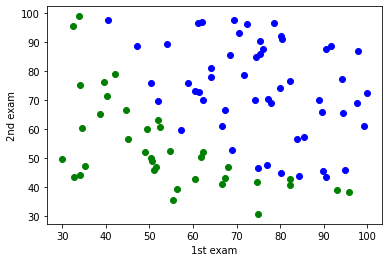

In [8]:
#from plotutil import plotData

data = np.loadtxt('pa3-data1-train.csv', delimiter=',')
X_train = data[:,:-1].T
y_train = data[:,-1].T

#plot data
plotData(X_train, y_train, "1st exam", "2nd exam")

data_test = np.loadtxt('pa3-data1-test.csv', delimiter=',')
X_test = data_test[:, :-1].T
y_test = data_test[:, -1].T

In [9]:
d = Run_Experiment(X_train, y_train, X_test, y_test, epochs = 2000, learning_rate = 0.02, print_loss = True)
# Plot learning curve (with costs)
losses = np.squeeze(d['losses'])
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epochs (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

TypeError: ignored

### Plot the learning curve ###

In [ ]:
plotData(normalize(X_train), y_train, xlabel="1st exam", ylabel="2nd exam", w = d["W"], b = d["w_0"])